<h1><center>Laboratorio 4: Spark y EDA</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Tomás Ignacio Reyes Oyarzún 


### **Link de repositorio de GitHub:** [Repositorio - TR](https://github.com/TomiReyes/MDS7202-TR)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Jueves a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo y análisis de grandes volúmenes de datos por medio de la libreria `pyspark`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl

## 1. Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

> Respuestas aquí

1. Spark distribuye mejor las tareas y permite ejecutar en paralelo. Particiona la información y es más práctico para el trabajo de grandes volumenes de datos. 
2. Los RDD son la base de Spark, representa los objetos particionados, una de sus principales características es que se pueden reconstruir de manera sencilla. Los RDD es una forma más básica de un df, con un df se pueden realizar operaciones de manera más práctica. 
3. Las acciones son más sencillas ya que devuelve un valor o actuan con un dato, las transformaciones entregan nuevos RDDs y se ejecutan considerando un conjunto de acciones para hacer el trabajo más eficiente. 
4. Particionar permite realizar trabajo en paralelo, lo cual hace más eficiente el trabajo con grandes volumenes de datos. Si no se particiona, o se particiona mal, el trabajo va a ser igual de ineficiente como si se utilizara una máquina (caso pandas).
5. Spark Driver gestiona la ejecución de tareas, mientras que los Spark Executors manejan la memoria, y gestionan los estados intermedios de ejecuciones, donde procesan las tareas y devuelven los resultados al Driver. 
6. Es el motor de las ejecuciones de Spark, haciendo más eficientes las consultas en SQL. Su función principal es hacer más eficientes las ejecuciones.


## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [1]:
#!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/Library/Java/JavaVirtualMachines/jdk-22.jdk/Contents/Home"

In [2]:
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType
from pyspark.sql import functions as F
import pickle


import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


/var/folders/bv/rkq_ppwn0kddqwvx0g_5c1tw0000gp/T/ipykernel_23874/820255167.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Cargue los datos usando **pyspark**

> Nota: Puede ser util el siguiente [enlace](https://www.oracle.com/cl/java/technologies/downloads/#jdk22-windows)

In [3]:
os.environ["PYSPARK_PYTHON"] = "/usr/bin/python3.11" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/bin/python3.11" 

# Escriba su respuesta aquí
sparksession = SparkSession.builder.master("local").appName("Desarrollo lab4").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/09/13 01:54:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
df = (
    sparksession.read
    .option("header",'True')
    .parquet("datos_lab_spark.parquet")
)

df_estilo_pandas = (
    sparksession.read
    .load(
        "datos_lab_spark.parquet",
        format="parquet",
        inferSchema="true",
        header="true"
    )
)

In [5]:
assert df.schema == df_estilo_pandas.schema

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Cree una función **cast_columns** que permita cambiar el tipo de datos de las columnas problemáticas. Luego utilice esta función respecto a lo respondido en la pregunta anterior.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [6]:
# Escriba su respuesta aquí
print(df.printSchema())
print(df.show(10))
print(df.sample(fraction=0.05, seed=10).show())
print(df.dtypes)

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)

None


+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

In [7]:
def cast_columns(df, cols_types):
    """
    Cambia el tipo de múltiples columnas en un DataFrame de Spark.

    Parámetros:
    - df: DataFrame de Spark.
    - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.

    Retorna:
    - DataFrame de Spark con tipos de columnas modificados.
    """
    for col_name, new_type in cols_types.items():
        df = df.withColumn(col_name, df[col_name].cast(new_type))
    return df

cols_to_cast = {"Quantity": IntegerType(), 
                "Customer Age": IntegerType(), 
                "Is An Alien": IntegerType(), 
                "Account Age Days": IntegerType(), 
                "Transaction Hour": IntegerType()}
df = cast_columns(df, cols_to_cast)

In [8]:
df = df.na.drop()
df = df.dropDuplicates()

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 4 productos o menos.
  * Compra mayorista: 5 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [9]:
# 1. 
df = df.withColumn(
    "Transaction bp",
    F.log(F.lit(48) + F.abs(F.col("Transaction Amount")**36))
)

In [10]:
# 2.
df = df.withColumn("Transaction Month", F.month(F.col("Transaction Date")))
df.show(5)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|    IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+
|8441d125-c6b8-444...|8be8b3cb-1102-42f...|             73.19|2020-07-09 00:00:

In [11]:
# 3.
df = df.withColumn(
    "Type of purchase",
    F.when(F.col("Quantity") <= 4, "Compra minorista")
    .otherwise("Compra mayorista")
)

df.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|8441d125-c6b8-444...|8be

In [12]:
# 4.
df_aliens = df.filter(F.col("Is An Alien") == 1)
df_aliens.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age| Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|877ac509-983f-430...|

In [13]:
# 5.
df_especie = df.groupby("Is An Alien").count()

df_especie.show()

+-----------+-----+
|Is An Alien|count|
+-----------+-----+
|          1|  688|
|          0|12700|
+-----------+-----+



In [14]:
# 6.
df_mean_amount = df.groupBy("Payment Method") \
    .pivot("Is An Alien") \
    .agg(F.avg("Transaction Amount").alias("Avg Transaction"))

df_mean_amount.show()

+--------------+------------------+------------------+
|Payment Method|                 0|                 1|
+--------------+------------------+------------------+
|    debit card|215.21641883519203| 547.1965168539324|
| bank transfer|215.15149230285903| 547.6004624277458|
|        PayPal|215.12598584753908|469.51776470588214|
|   credit card|206.31122327044054| 517.7530538922155|
+--------------+------------------+------------------+



### 4. EDA [20 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas** (2 puntos): Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas** (2 puntos por visualización):
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas** (2 puntos por visualización):
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones** (2 puntos por visualización):
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

In [15]:
df_pandas = df.toPandas()
df_pandas.head(4)

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is An Alien,Account Age Days,Transaction Hour,Transaction bp,Transaction Month,Type of purchase
0,8441d125-c6b8-4441-ade7-8c2afec0823e,8be8b3cb-1102-42f4-82da-81b911248b11,73.19,2020-07-09,PayPal,toys & games,5,35,New Allisonton,tablet,43.47.125.63,"PSC 8336, Box 0269\nAPO AE 66357","PSC 8336, Box 0269\nAPO AE 66357",0,81,6,154.550117,7,Compra mayorista
1,25aaaf63-f8c4-45da-a7dc-7c13c0a64f59,faec099b-02ac-44c0-9ad3-91e0f1290b16,327.76,2024-07-30,PayPal,health & beauty,2,26,Williamshaven,mobile,116.130.75.103,"5096 Howard Ridges\nEast Lisaport, GU 71402","5096 Howard Ridges\nEast Lisaport, GU 71402",0,363,6,208.522139,7,Compra minorista
2,04cf3438-6677-4251-a62a-0fb76b37ed5c,a87dba6b-6f39-4482-9f36-893acbb872b3,142.17,2022-07-16,credit card,home & garden,1,26,Tinaberg,tablet,37.81.126.73,"625 Escobar Lake\nDavidborough, WV 98898","PSC 2598, Box 6239\nAPO AP 01724",0,197,11,178.452847,7,Compra minorista
3,dc12a480-1d0f-48bc-92c5-7b25223483af,88ce4cae-95cd-482d-970c-0aea23f2df79,64.13,2019-08-09,bank transfer,clothing,2,29,Santosbury,tablet,121.38.58.10,"08077 Rojas Pines Suite 303\nHarperchester, GA...","08077 Rojas Pines Suite 303\nHarperchester, GA...",0,318,19,149.792842,8,Compra minorista


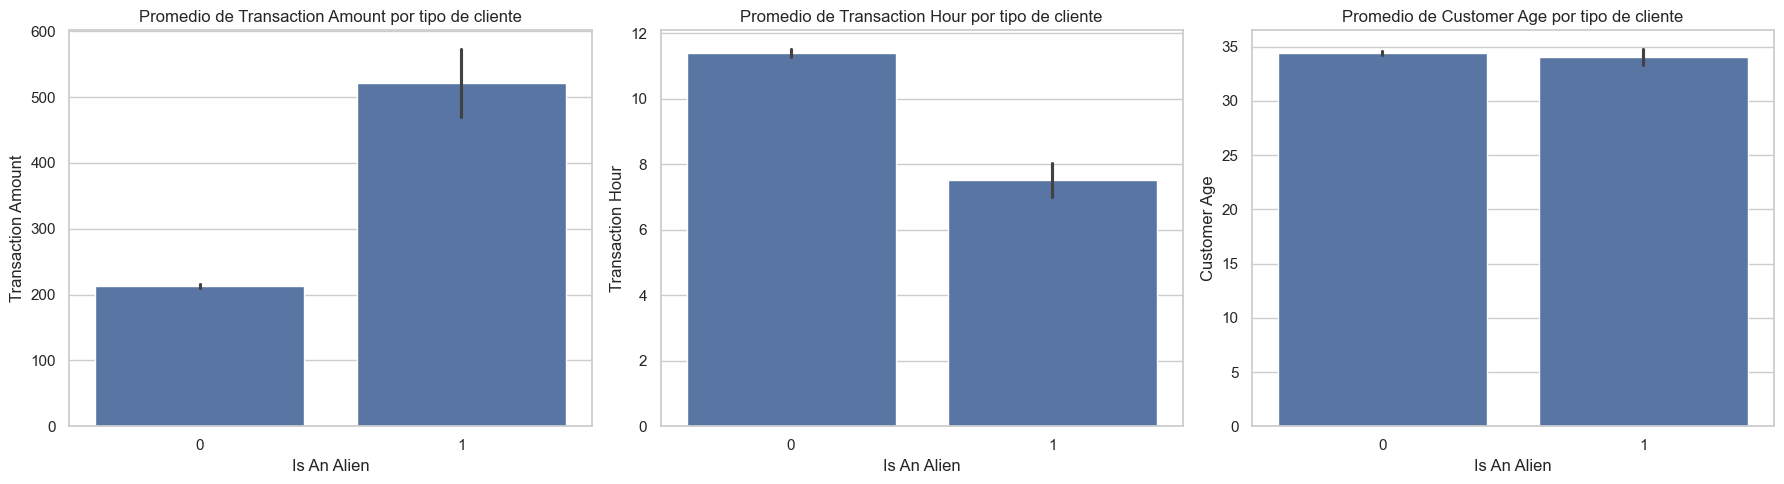

In [16]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=df_pandas, x="Is An Alien", y="Transaction Amount", ax=axes[0])
axes[0].set_title("Promedio de Transaction Amount por tipo de cliente")

sns.barplot(data=df_pandas, x="Is An Alien", y="Transaction Hour", ax=axes[1])
axes[1].set_title("Promedio de Transaction Hour por tipo de cliente")

sns.barplot(data=df_pandas, x="Is An Alien", y="Customer Age", ax=axes[2])
axes[2].set_title("Promedio de Customer Age por tipo de cliente")

plt.tight_layout()
plt.show()


Para analizar las diferencias entre humanos y aliens, se estudian 3 casos: el promedio de las transacciones que realizó cada especie, el promedio de las horas en que se realizó la transacción y el promedio de la edad de los clientes. 

Respecto al promedio de las transacciones, los aliens en promedio gastan mucho más que los humanos, aunque hay que considerar que los aliens son menos casos pero su promedio es más del doble de que los humanos. Para la hora promedio, los humanos compran más tarde que los aliens, por lo que se pueden realizar ofertas distintas por hora. Y para la edad promedio, no hay diferencias significativas entre humanos y aliens.

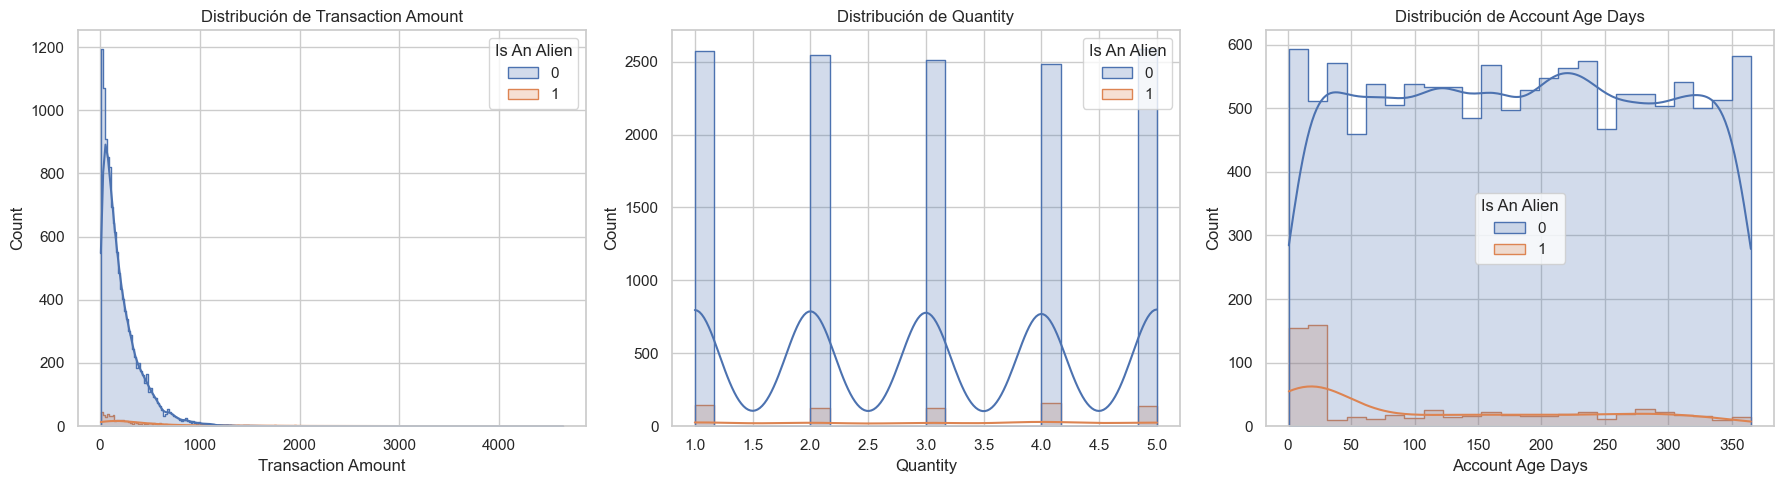

In [17]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=df_pandas, x="Transaction Amount", hue="Is An Alien", kde=True, ax=axes[0], element="step")
axes[0].set_title("Distribución de Transaction Amount")

sns.histplot(data=df_pandas, x="Quantity", hue="Is An Alien", kde=True, ax=axes[1], element="step")
axes[1].set_title("Distribución de Quantity")

sns.histplot(data=df_pandas, x="Account Age Days", hue="Is An Alien", kde=True, ax=axes[2], element="step")
axes[2].set_title("Distribución de Account Age Days")

plt.tight_layout()
plt.show()

A diferencia de lo visto en el gráfico de barras, los humanos gastan más que los aliens, pero el promedio beneficia a los aliens porque son menos casos, pero hay diferencias importantes entre una especie y otra.
Para el caso de la cantidad, los humanos tienen mucho más que los aliens. Al igual que los días que tiene la cuenta, los valores son mayores para los humanos. 

En general estos gráficos se ven distorsionados por las diferencias de la cantidad de casos de los humanos y de los aliens, que son mucho más para los humanos.

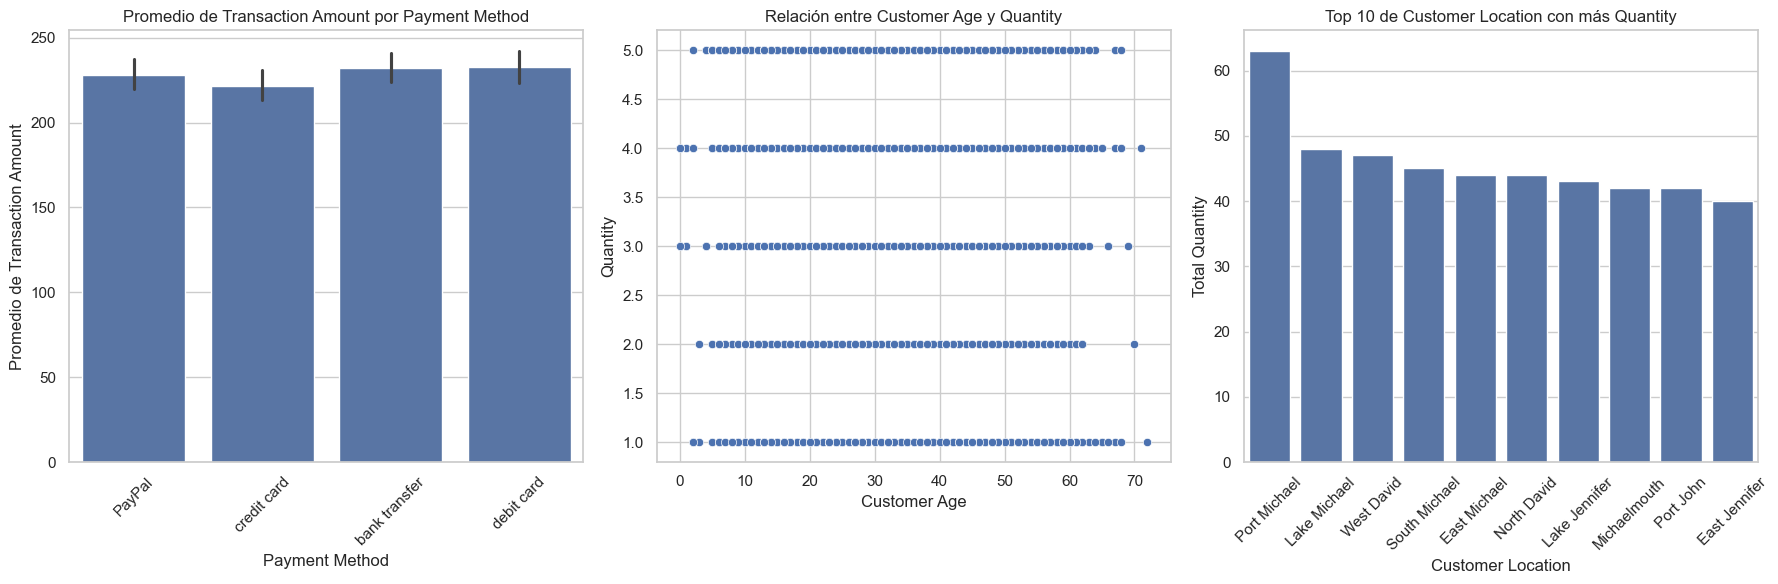

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=df_pandas, x="Payment Method", y="Transaction Amount", estimator='mean', ax=axes[0])
axes[0].set_title("Promedio de Transaction Amount por Payment Method")
axes[0].set_xlabel("Payment Method")
axes[0].set_ylabel("Promedio de Transaction Amount")
axes[0].tick_params(axis='x', rotation=45)

sns.scatterplot(data=df_pandas, x="Customer Age", y="Quantity", ax=axes[1])
axes[1].set_title("Relación entre Customer Age y Quantity")
axes[1].set_xlabel("Customer Age")
axes[1].set_ylabel("Quantity")


top10_locations = df_pandas.groupby("Customer Location")["Quantity"].sum().nlargest(10).reset_index()

sns.barplot(data=top10_locations, x="Customer Location", y="Quantity", ax=axes[2])
axes[2].set_title("Top 10 de Customer Location con más Quantity")
axes[2].set_xlabel("Customer Location")
axes[2].set_ylabel("Total Quantity")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Se analizó el promedio de las transacciones para cada medio de pago, para ver si alguno tenía mayor impacto, pero no es el caso, donde no hay diferencias importantes.
En el segundo gráfico, se buscó ver si dado la edad cambiaba la cantidad comprada pero tampoco es el caso, ya que la distribución es uniforme independiente de la edad. 
Y en tercer caso, se mostraron las 10 tiendas con mayores ventas, para analizar donde están los lugares que generan más ventas.

### 5. Particiones y consultas en SQL [2 puntos]

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark** (2 puntos):
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes** (Bonus: 2 punto):
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark** (Bonus: 2 punto):
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



In [19]:
df_pandas["Transaction Month"].value_counts()  

Transaction Month
3     1186
7     1161
8     1137
11    1137
1     1120
5     1119
6     1119
4     1110
9     1098
10    1097
12    1083
2     1021
Name: count, dtype: int64

Viendo el valor del value_counts() anterior, se particiona por mes de la transacción, por la uniformidad de la cantidad de los datos.

In [21]:
df.write \
    .partitionBy("Transaction Month") \
    .mode("overwrite") \
    .saveAsTable("transacciones_particionadasv3")

In [22]:
df.createOrReplaceTempView("transacciones")

In [23]:
top10_customers = sparksession.sql("""
    SELECT `Customer ID`, SUM(Quantity) AS sumQuantity
    FROM transacciones
    GROUP BY `Customer ID`
    ORDER BY sumQuantity DESC
    LIMIT 10
""")

top10_customers.show()

+--------------------+-----------+
|         Customer ID|sumQuantity|
+--------------------+-----------+
|6def79d9-fb71-415...|          5|
|abc58f3b-387c-455...|          5|
|2f3d5b31-bd85-4d7...|          5|
|ddfbe502-d51c-4ac...|          5|
|aa8c72f5-fbcc-4bf...|          5|
|ebf10b43-2999-4fa...|          5|
|866e29ec-dd8e-4a1...|          5|
|6300f942-b86d-433...|          5|
|e91ebafd-1925-400...|          5|
|a76f00f5-8493-41b...|          5|
+--------------------+-----------+



### 6. UDF [12 puntos]

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col1, col2, col3, col4):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función. (1 punto)
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad. (1 punto)
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito. (6 puntos)
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado. (2 punto)
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf? (2 puntos)

In [24]:
with open('object.pkl', 'rb') as file:
    fraud_model = pickle.load(file)

print(type(fraud_model))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [25]:
print(dir(fraud_model))
help(fraud_model)

['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_metadata_routing', 'get_p

In [26]:
sparksession.stop()

Aquí ya no supe como seguir :(